In [365]:
import pandas as pd

In [366]:
import jupyter_dash

In [367]:
import numpy as np

In [368]:
import csv

In [369]:
import matplotlib.pyplot as plt

In [370]:
import plotly.express as px

In [371]:
import seaborn as sb

In [372]:
import plotly.graph_objects as go

In [373]:
import cufflinks as cf

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
from sklearn.linear_model import LogisticRegression

In [376]:
import ipywidgets as widgets

In [377]:
import ipywidgets

In [378]:
import logging

In [379]:
from sklearn.metrics import confusion_matrix

In [380]:
from sklearn.linear_model import LinearRegression

In [381]:
%matplotlib inline
cf.go_offline()

In [382]:
sold = pd.read_csv("C964Data.csv")

In [383]:
sold1 = pd.read_csv("C964SoldPercent.csv")

In [384]:
train = pd.read_csv("C964Predict.csv")

In [385]:
cRate = pd.read_csv("C964Rate.csv")

In [386]:
trainS = pd.read_csv("C964PredictSale.csv")

In [387]:
trainA = pd.read_csv("C964PredictAll.csv")

In [388]:
rate = pd.read_csv("C964Rate.csv")

In [389]:
percent = pd.read_csv("C964Percent.csv")

In [390]:
percent1 = pd.read_csv("C964Percent1.csv")

In [391]:
cRate1 = pd.read_csv("MonthColRate1.csv")

**All issues and errors are sent to a separate log file called mylog.**

In [392]:
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

**Historical data from 2018 to current is presented below. It will include the sale percentage compared to the inventory of that month, if the sale percentage exceeded the inventory, and the monthly interest rate percentage**

In [393]:
train.head(12)

,2018,2019,2020,2021,2022,2018Pred,2019Pred,2020Pred,2021Pred,2022Pred,2018Rate,2019Rate,2020Rate,2021Rate,2022Rate
0,95.1,94.3,96.9,100.3,107.2,0,0,0,1,1.0,4.03,4.46,3.62,2.74,3.45
1,96.7,96.3,97.4,108.4,107.9,0,0,0,1,1.0,4.33,4.37,3.47,2.81,3.76
2,95.1,98.4,99.2,106.2,97.0,0,0,0,1,0.0,4.44,4.27,3.45,3.08,4.17
3,95.4,102.1,105.3,104.6,93.7,0,1,1,1,0.0,4.47,4.14,3.31,3.06,4.98
4,100.7,102.4,99.2,101.6,NaN,1,1,0,1,NaN,4.59,4.07,3.23,2.96,5.23
5,101.6,99.0,103.6,98.6,NaN,1,0,1,0,NaN,4.57,3.80,3.16,2.98,NaN
6,101.6,100.4,106.5,96.4,NaN,1,1,1,0,NaN,4.53,3.77,3.02,2.87,NaN
7,101.7,103.1,105.8,94.3,NaN,1,1,1,0,NaN,4.55,3.62,2.94,2.84,NaN
8,101.7,103.0,105.6,101.7,NaN,1,1,1,1,NaN,4.63,3.61,2.89,2.90,NaN
9,98.0,99.3,102.1,99.5,NaN,0,0,1,0,NaN,4.83,3.69,2.83,3.07,NaN


**The multi line graph below shows the selling patterns of homes sold throughout the years**

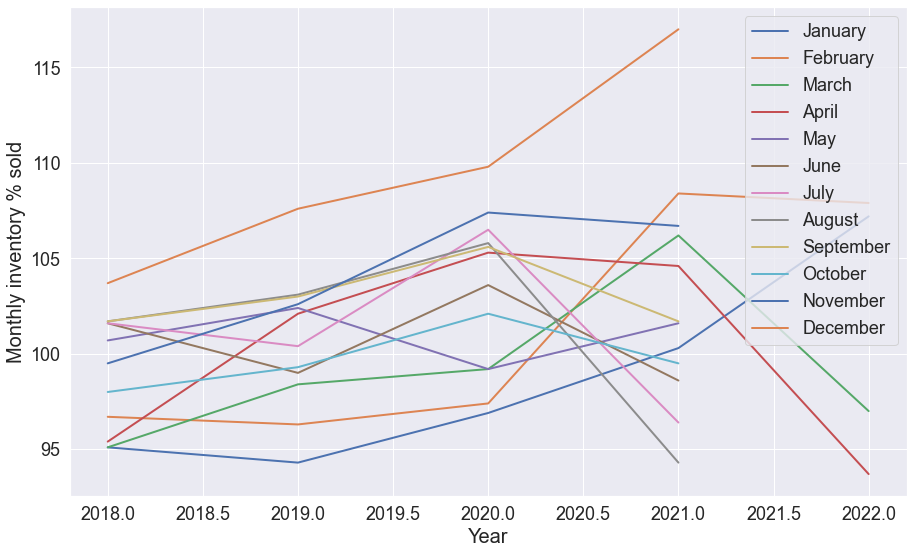

In [394]:
try:
    plt.rcParams['figure.figsize'] = (15, 9)
    x = [2018,2019,2020,2021,2022]
    for col in percent1.columns:
        plt.plot(x,percent1[col], linewidth=2, label=col)
        
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Monthly inventory % sold', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    plt.show()
    
except Exception as e:
    logger.critical(e)

**This multi line graph shows the interest rates through out the years. As you might be able to tell, the interest rate trend is more consistent than the buying trend**

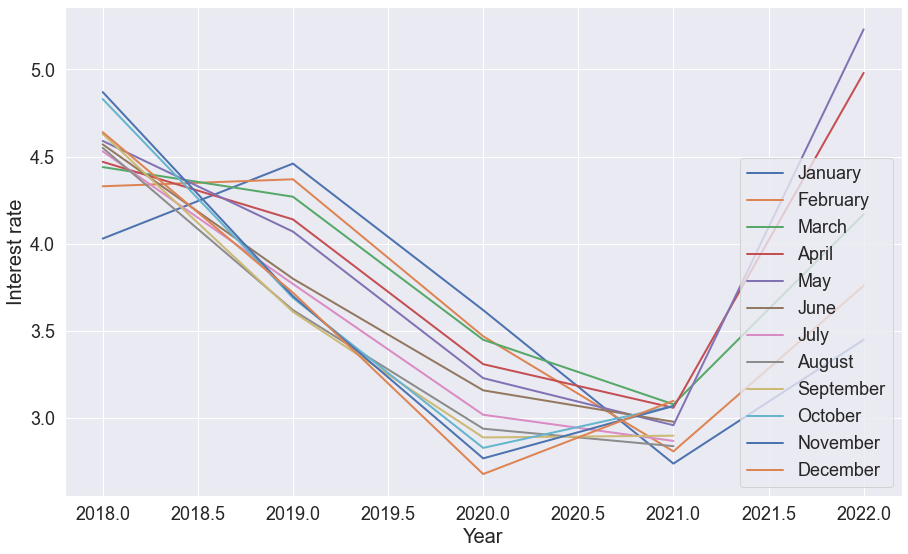

In [395]:
try:    
    plt.rcParams['figure.figsize'] = (15, 9)
    x = [2018,2019,2020,2021,2022]

    for col in rate.columns:
        plt.plot(x,rate[col], linewidth=2, label=col)

    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Interest rate', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    plt.show()
    
    
except Exception as e:
    logger.critical(e)

**The data frame summary. Comparing the rates throughout the years and also showing figures like mean, min and max, and count**

In [396]:
# Converting the Date column to the datestamp type
sold['Month'] = pd.to_datetime(sold['Month'])

# Sorting data in ascending order by the date
sold = sold.sort_values(by='Month')

# Now, setting the Date column as the index of the dataframe
sold.set_index('Month', inplace=True)

# Print the new dataframe and its summary
print(sold.head(), sold.describe(), sep='\n\n')

                               January  February  March  April   May  June  \
Month                                                                        
1970-01-01 00:00:00.000002018     4.03      4.33   4.44   4.47  4.59  4.57   
1970-01-01 00:00:00.000002019     4.46      4.37   4.27   4.14  4.07  3.80   
1970-01-01 00:00:00.000002020     3.62      3.47   3.45   3.31  3.23  3.16   
1970-01-01 00:00:00.000002021     2.74      2.81   3.08   3.06  2.96  2.98   
1970-01-01 00:00:00.000002022     3.45      3.76   4.17   4.98  5.23   NaN   

                               July  August  September  October  ...  MarchP  \
Month                                                            ...           
1970-01-01 00:00:00.000002018  4.53    4.55       4.63     4.83  ...    95.1   
1970-01-01 00:00:00.000002019  3.77    3.62       3.61     3.69  ...    98.4   
1970-01-01 00:00:00.000002020  3.02    2.94       2.89     2.83  ...    99.2   
1970-01-01 00:00:00.000002021  2.87    2.84       2.9

**This bar graph shows the sale percentage. There is a black horizontal line showing the invenotry for that month. Looking at the graph, you'll see December being a very popular month, which until recent, January was the least**

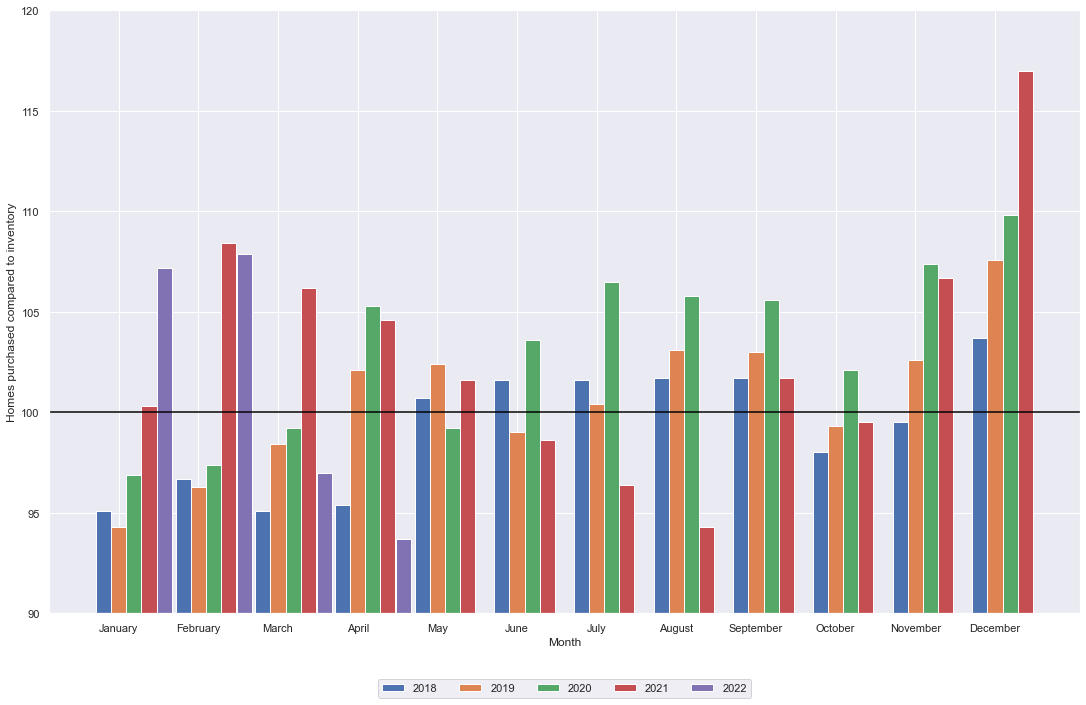

In [397]:
try:    
    names = sold1['Month'].values
    x = np.arange(len(names))
    w = 0.19
    y = 0.2
    plt.axhline(y=100, color = 'Black', linestyle ='-')
    plt.bar(x-w, sold1['2018'].values, width=w, label='2018')
    plt.bar(x, sold1['2019'].values, width=w, label='2019')
    plt.bar(x+w, sold1['2020'].values, width=w, label='2020')
    plt.bar(x+w+w, sold1['2021'].values, width=w, label='2021')
    plt.bar(x+w+y+w, sold1['2022'].values, width=w, label='2022')
    plt.xticks(x, names)
    plt.ylim([90,120])
    plt.tight_layout()
    plt.xlabel('Month')
    plt.ylabel('Homes purchased compared to inventory')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=5)
    plt.savefig("CSVBarplots.png", bbox_inches="tight")
    plt.show()
    
except Exception as e:
    logger.critical(e)

**The interest rate bar graph has a consistent trend of the rates decreasing through the year. While 2022 is gaining steadily as the months proceed**

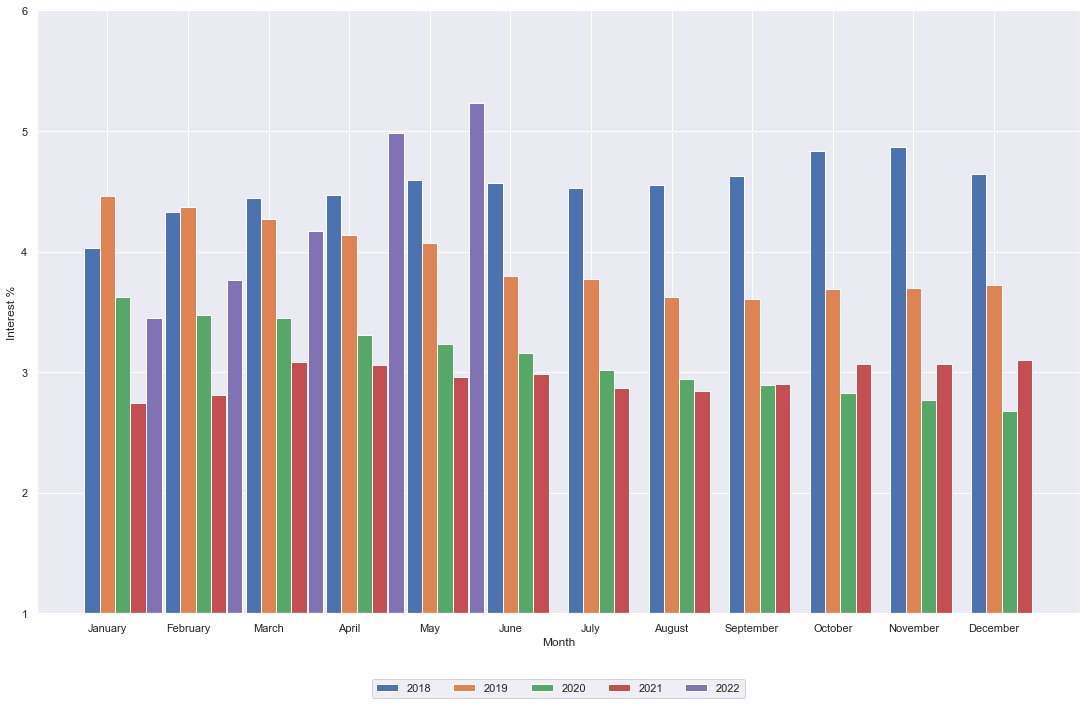

In [398]:
try:
    names = cRate1['Month'].values
    x = np.arange(len(names))
    w = 0.19
    y = 0.2
    plt.bar(x-w, cRate1['2018'].values, width=w, label='2018')
    plt.bar(x, cRate1['2019'].values, width=w, label='2019')
    plt.bar(x+w, cRate1['2020'].values, width=w, label='2020')
    plt.bar(x+w+w, cRate1['2021'].values, width=w, label='2021')
    plt.bar(x+w+y+w, cRate1['2022'].values, width=w, label='2022')
    plt.xticks(x, names)
    plt.ylim([1,6])
    plt.tight_layout()
    plt.xlabel('Month')
    plt.ylabel('Interest %')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=5)
    plt.show()
    
except Exception as e:
    logger.critical(e)

**Null values in the aquired data**

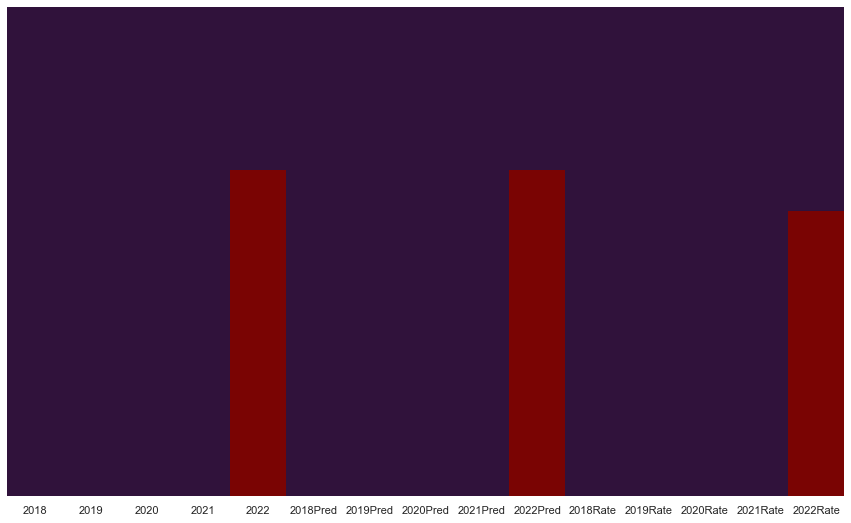

In [399]:
try:
    sb.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='turbo')
    
except Exception as e:
    logger.critical(e)

**An interactive graph showing the range amounts of the interest rates since 2018**

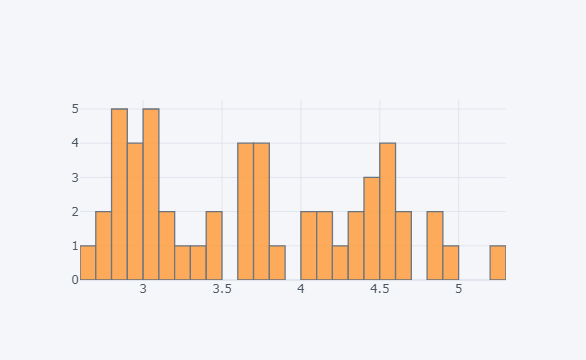

In [400]:
try:
    trainS['Rate'].iplot(kind='hist', bins=50)
    
except Exception as e:
    logger.critical(e)

**This boxplot graph is a representation of the times the homes sold more than that months inventory. As you can see, as indicated as 1, more homes are sold at a lower interest rate**

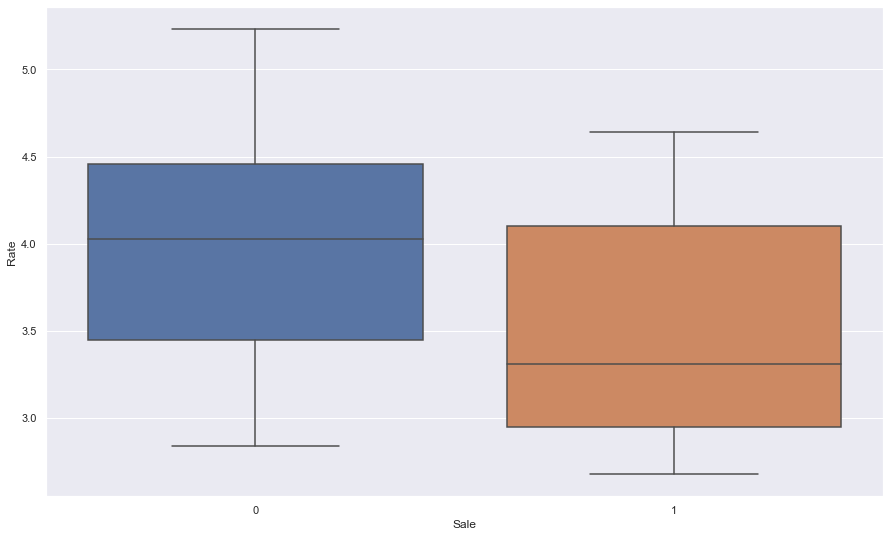

In [401]:
try:
    sb.boxplot(x='Sale',y='Rate',data=trainS)
    
except Exception as e:
    logger.critical(e)

In [402]:
X = trainS.drop('Sale', axis = 1)
y = trainS['Sale']

In [403]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=10)

In [404]:
#Instance of logistic regression
logmodel = LogisticRegression()

**Logistical regression is a very direct statistical model. It is consistently used for classification and predictive analytics. This approach will tell is something did or did not happen. Indicated by a 0 for no and a 1 for yes**

In [405]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [406]:
predictions = logmodel.predict(X_test)

**A classification report tells the user various metrics related to how well a machine learning model has performed. The closer the accuracy score is to 1, the more accurate the model becomes**

In [407]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.75      0.75      0.75        12

    accuracy                           0.67        18
   macro avg       0.62      0.62      0.62        18
weighted avg       0.67      0.67      0.67        18



In [408]:
y1 = (confusion_matrix(y_test,predictions))

**Another way to show a how well an algorithm performs is through a specific table layout that allows visualization of the performed algorithm though a heatmap**

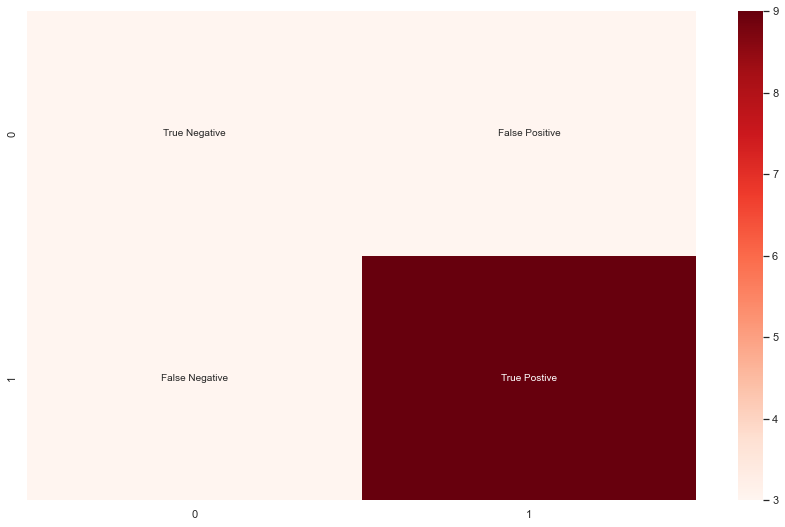

In [409]:
try:
    labels = ['True Negative', 'False Positive', 'False Negative', 'True Postive']
    labels = np.array(labels).reshape(2,2)
    sb.heatmap(y1, annot = labels,fmt='', cmap = 'Reds')
    
except Exception as e:
    logger.critical(e)    

**Linear regression models the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.**

In [410]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [411]:
print(lm.intercept_)

1.319019709091397


In [412]:
lm.coef_

array([-0.20205339])

In [413]:
trainS=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [414]:
predictions = lm.predict(X_test)

In [415]:
predictions

array([0.65022298, 0.69669526, 0.69871579, 0.56738108, 0.7350854 ,
       0.58960696, 0.41584104, 0.72498273, 0.57344269, 0.47645706,
       0.39967677, 0.40371784, 0.7169006 , 0.42190264, 0.73912647,
       0.75933181, 0.33501968, 0.75124967])

In [416]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [417]:
y = trainA['Percent']
x1 = trainA['Rate']

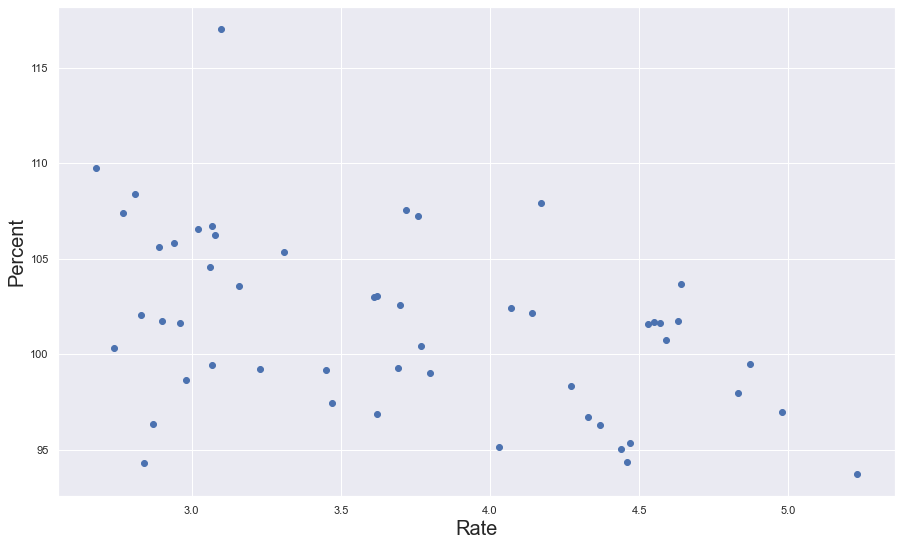

In [418]:
try:    
    plt.scatter(x1,y,color='C0')
    plt.xlabel('Rate',fontsize=20)
    plt.ylabel('Percent',fontsize=20)
    plt.show()

except Exception as e:
    logger.critical(e)  

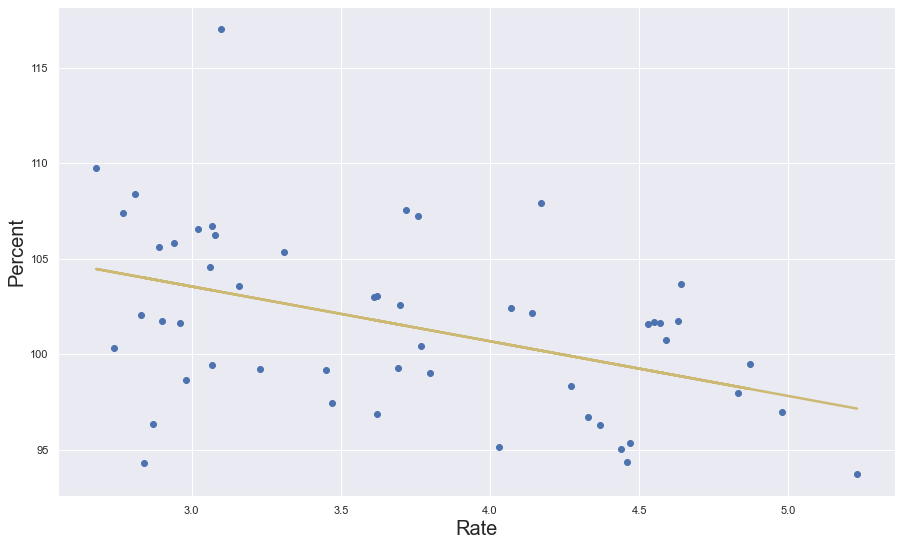

In [419]:
try:    
    x = sm.add_constant(x1)
    reg_lin = sm.OLS(y,x)
    results_lin = reg_lin.fit()

    plt.scatter(x1,y,color = 'C0')
    y_hat = x1*results_lin.params[1]+results_lin.params[0]

    plt.plot(x1,y_hat,lw=2.5,color='C8')
    plt.xlabel('Rate', fontsize = 20)
    plt.ylabel('Percent', fontsize = 20)
    plt.show()
    
except Exception as e:
    logger.critical(e)  

In [420]:
from sklearn import metrics
metrics.mean_absolute_error(y,x1)

97.8204293776923

In [421]:
metrics.mean_squared_error(y,x1)

9594.114744051793

In [422]:
np.sqrt(metrics.mean_squared_error(y,x1))

97.94955203599346

C:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

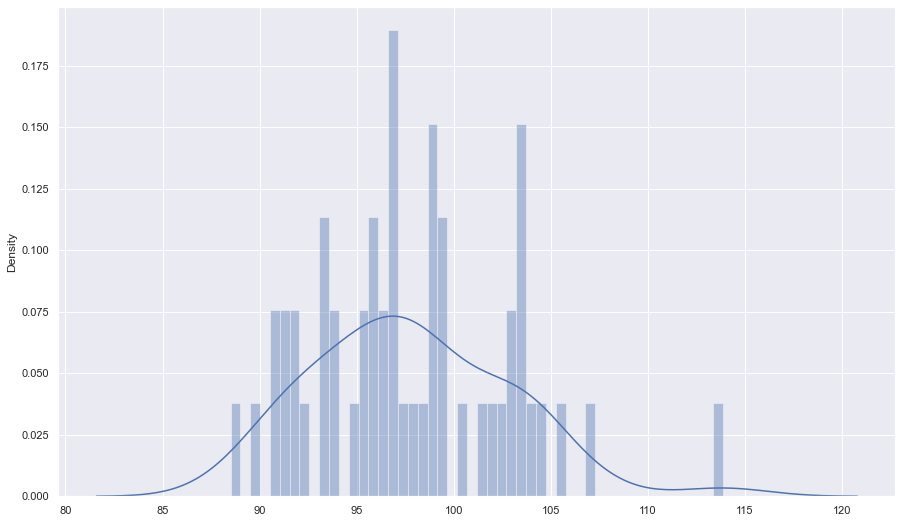

In [423]:
sb.distplot((y-x1),bins=50)

**This interactive multiple line graph was designed to show how the interest rate affects the selling rate. This takes the highest and the lowest selling rate and bases it off of that year’s interest rate. It then has a slide bar that will adjust the years interest rate by adding or removing 50%. The overall rate is significant but there is also a very subtle change between the high and low comparison**

In [424]:
jM = cRate['January'].mean()
fM = cRate['February'].mean()
mM = cRate['March'].mean()
aM = cRate['April'].mean()
maM = cRate['May'].mean()
juM = cRate['June'].mean()
julM = cRate['July'].mean()
auM = cRate['August'].mean()
sM = cRate['September'].mean()
oM = cRate['October'].mean()
nM = cRate['September'].mean()
dM = cRate['December'].mean()

In [425]:
eL = sold1['2018'].min()
eH = sold1['2018'].max()
nL = sold1['2019'].min()
nH = sold1['2019'].max()
tL = sold1['2020'].min()
tH = sold1['2020'].max()
toL = sold1['2021'].min()
toH = sold1['2021'].max()
ttL = sold1['2022'].min()
ttH = sold1['2022'].max()
eM = train['2018Rate'].mean()
nM = train['2019Rate'].mean()
tM = train['2020Rate'].mean()
toM = train['2021Rate'].mean()
ttM = train['2022Rate'].mean()


In [426]:
eL = eL / eM
eH = eH / eM
nL = nL / nM
nH = nH / nM
tL = tL / tM
tH = tH / tM
toL = toL / toM
toH = toH / toM
ttL = ttL / ttM
ttH = ttH / ttM

a = [eL, eH]
b = [nL, nH]
c = [tL, tH]
d = [toL, toH]
e = [ttL, ttH]
f = [1, 2]
h = [1, 2]
j = [1, 2]
k = [1, 2]
l = [1, 2]

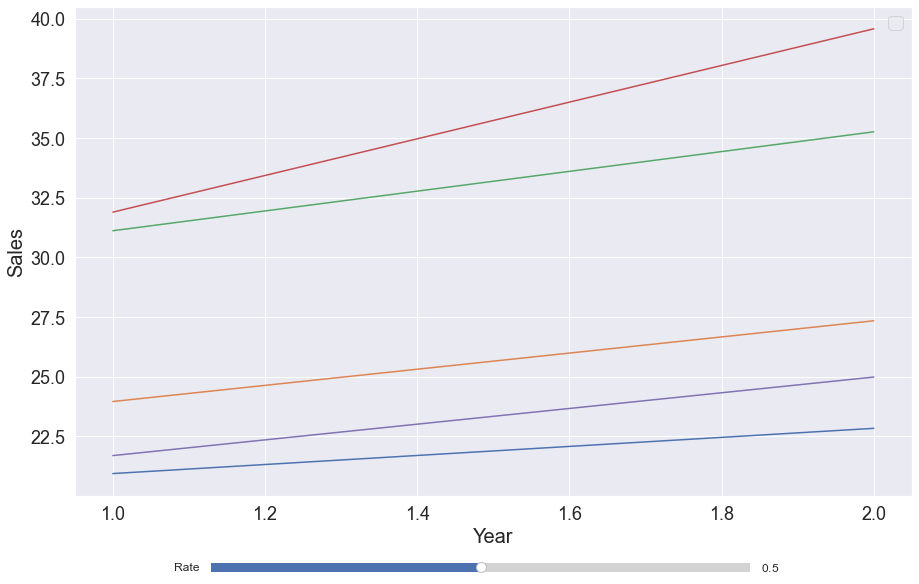

In [427]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
from matplotlib.widgets import Slider, Button
try:

    aa, = plt.plot(f, a)
    bb, = plt.plot(h, b)
    cc, = plt.plot(j, c)
    dd, = plt.plot(k, d)
    ee, = plt.plot(l, e)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Sales', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    ax1 = plt.axes([0.25, 0.0, 0.50, 0.03])
    w1 = Slider(
        ax=ax1,
        label='Rate',
        valmin=-99,
        valmax=99,
    )
    def update(val):
        val = val / 100
        aa.set_data(f, (val + eL, val + eH))
        bb.set_data(f, (val + nL, val + nH))
        cc.set_data(f, (val + tL, val + tH))
        dd.set_data(f, (val + toL, val + toH))
        ee.set_data(f, (val + ttL, val + ttH))
        fig.canvas.draw_idle()

    w1.on_changed(update)

    plt.show()

except Exception as e:
    logger.critical(e)  